In [1]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer() # Convert a collection of text documents to a matrix of token counts.

v.fit(["Chem the charming is looking for a job"])
# the fit method "learn(s) a vocabulary dictionary of all tokens in the raw documents
#  it creates a dictionary of tokens (by default the tokens are words
v.vocabulary_

{'chem': 1, 'the': 6, 'charming': 0, 'is': 3, 'looking': 5, 'for': 2, 'job': 4}

In [2]:
V = CountVectorizer(ngram_range=(1,2)) # i.e. ngram_range creates a bag of words of 1 & 2 as given
V.fit(["Chem the charming is looking for a job"])
V.vocabulary_

{'chem': 2,
 'the': 11,
 'charming': 0,
 'is': 6,
 'looking': 9,
 'for': 4,
 'job': 8,
 'chem the': 3,
 'the charming': 12,
 'charming is': 1,
 'is looking': 7,
 'looking for': 10,
 'for job': 5}

In [3]:
# Bag of words in the range of 1 and 3 tokens
V = CountVectorizer(ngram_range=(1,3))
V.fit(["Chem the charming is looking for a job"])
V.vocabulary_

{'chem': 3,
 'the': 15,
 'charming': 0,
 'is': 8,
 'looking': 12,
 'for': 6,
 'job': 11,
 'chem the': 4,
 'the charming': 16,
 'charming is': 1,
 'is looking': 9,
 'looking for': 13,
 'for job': 7,
 'chem the charming': 5,
 'the charming is': 17,
 'charming is looking': 2,
 'is looking for': 10,
 'looking for job': 14}

In [4]:
# Corpus of words
corpus = [
    "Chem is charming guy",
    "Chem likes to eat stuff from bakery",
    "Chem also likes wine"
]

In [5]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [6]:
# Lemmatize and remove the stopwords
def Preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_punct or token.is_stop:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [7]:
Preprocess("Chem is a charming guy")

'Chem charming guy'

In [8]:
corpus_processed = [Preprocess(token) for token in corpus]
corpus_processed

['Chem charming guy', 'chem like eat stuff bakery', 'Chem like wine']

In [9]:
V.fit(corpus_processed)
V.vocabulary_

{'chem': 3,
 'charming': 1,
 'guy': 12,
 'chem charming': 4,
 'charming guy': 2,
 'chem charming guy': 5,
 'like': 13,
 'eat': 9,
 'stuff': 17,
 'bakery': 0,
 'chem like': 6,
 'like eat': 14,
 'eat stuff': 10,
 'stuff bakery': 18,
 'chem like eat': 7,
 'like eat stuff': 15,
 'eat stuff bakery': 11,
 'wine': 19,
 'like wine': 16,
 'chem like wine': 8}

In [10]:
# Generate a bag of n gram vector for few sample documents
V.transform(["Chem is a charming guy"]).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [12]:
import pandas as pd

df = pd.read_json('News_Dataset.json',lines=True)
print(df.shape)

df.head()

(209527, 6)


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [13]:
df.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [14]:
# Handling class imbalance

min_samples = 8791

df_Parenting = df[df.category=='PARENTING'].sample(min_samples,random_state=2022)
df_Travel = df[df.category=='TRAVEL'].sample(min_samples,random_state=2022)
df_Entertainment = df[df.category=='ENTERTAINMENT'].sample(min_samples,random_state=2022)
df_Wellness = df[df.category=='WELLNESS'].sample(min_samples,random_state=2022)
df_Politics = df[df.category=='POLITICS'].sample(min_samples,random_state=2022)

In [15]:
df_balanced = pd.concat([df_Parenting,df_Travel,df_Entertainment,df_Wellness,df_Politics],axis=0)
df_balanced.category.value_counts()

PARENTING        8791
TRAVEL           8791
ENTERTAINMENT    8791
WELLNESS         8791
POLITICS         8791
Name: category, dtype: int64

In [16]:
df_balanced['Category_num'] = df_balanced['category'].map({
    'PARENTING':0,
    'TRAVEL':1,
    'ENTERTAINMENT':2,
    'WELLNESS':3,
    'POLITICS':4,})
df_balanced.head(3)

,link,headline,category,short_description,authors,date,Category_num
154193,https://www.huffingtonpost.comhttp://ideas.tim...,Bringing Up a 9/11 Baby,PARENTING,"One year ago today, at 11:45 pm, my wife gave ...",,2013-09-11,0
201170,https://www.huffingtonpost.com/entry/ethan-pia...,"Ethan Walmark, 6-Year-Old With Autism, Plays '...",PARENTING,"Ethan Walmark, 6, was diagnosed with autism fo...",Jessica Samakow,2012-04-27,0
140458,https://www.huffingtonpost.com/entry/how-to-lo...,How to Lose an Argument With a 5-Year-Old,PARENTING,"Listen to me closely, mister. From this point ...","Wendi Aarons, Contributor\nHumor writer, blogg...",2014-02-03,0


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.short_description, 
    df_balanced.Category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.Category_num
)

In [18]:
print(X_train.shape)
X_train.head()

(35164,)


128846                                                     
148225    I make my big declarations of gratitude at Tha...
198654    Lightly lined, seamless bandeau, structured ba...
43637     After many delays, the Senate can now proceed ...
162076    This past Memorial Day weekend, we became “tha...
Name: short_description, dtype: object

In [19]:
y_train.value_counts()

2    7033
0    7033
3    7033
1    7033
4    7032
Name: Category_num, dtype: int64

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.78      0.61      1758
           1       0.80      0.74      0.77      1758
           2       0.80      0.45      0.58      1758
           3       0.68      0.79      0.73      1758
           4       0.84      0.67      0.74      1759

    accuracy                           0.69      8791
   macro avg       0.72      0.69      0.69      8791
weighted avg       0.72      0.69      0.69      8791



In [21]:
X_test[:5]

25922     Hope you had a nice long weekend, this is the ...
103888    Flight attendants take on a crucial role after...
194877    Tom Cruise's personal life may be in shambles,...
137804    With all the DOs and DON’Ts of dieting, losing...
196331    We tend to think mistakes get in the way of pr...
Name: short_description, dtype: object

In [22]:
y_pred[:5]

array([4, 1, 4, 3, 3], dtype=int64)

In [23]:
y_test[:5]

25922     4
103888    1
194877    2
137804    3
196331    3
Name: Category_num, dtype: int64

In [24]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.81      0.60      1758
           1       0.76      0.72      0.74      1758
           2       0.90      0.31      0.47      1758
           3       0.63      0.83      0.72      1758
           4       0.87      0.59      0.70      1759

    accuracy                           0.65      8791
   macro avg       0.73      0.65      0.64      8791
weighted avg       0.73      0.65      0.64      8791



In [25]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.80      0.58      1758
           1       0.74      0.71      0.72      1758
           2       0.91      0.27      0.41      1758
           3       0.60      0.82      0.69      1758
           4       0.88      0.56      0.68      1759

    accuracy                           0.63      8791
   macro avg       0.72      0.63      0.62      8791
weighted avg       0.72      0.63      0.62      8791



In [26]:
df_balanced['preprocessed_txt'] = df_balanced['short_description'].apply(Preprocess)
df_balanced.head(3)

,link,headline,category,short_description,authors,date,Category_num,preprocessed_txt
154193,https://www.huffingtonpost.comhttp://ideas.tim...,Bringing Up a 9/11 Baby,PARENTING,"One year ago today, at 11:45 pm, my wife gave ...",,2013-09-11,0,year ago today 11:45 pm wife give birth son Ba...
201170,https://www.huffingtonpost.com/entry/ethan-pia...,"Ethan Walmark, 6-Year-Old With Autism, Plays '...",PARENTING,"Ethan Walmark, 6, was diagnosed with autism fo...",Jessica Samakow,2012-04-27,0,Ethan Walmark 6 diagnose autism year ago feel ...
140458,https://www.huffingtonpost.com/entry/how-to-lo...,How to Lose an Argument With a 5-Year-Old,PARENTING,"Listen to me closely, mister. From this point ...","Wendi Aarons, Contributor\nHumor writer, blogg...",2014-02-03,0,listen closely mister point long argue want ac...


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt, 
    df_balanced.Category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.Category_num
)
print(X_train.shape)
X_train.head()

(35164,)


128846                                                     
148225    big declaration gratitude Thanksgiving dinner ...
198654    lightly lined seamless bandeau structured band...
43637     delay Senate proceed confirmation process fast...
162076    past Memorial Day weekend family swear tv fami...
Name: preprocessed_txt, dtype: object

In [28]:
y_train.value_counts()

2    7033
0    7033
3    7033
1    7033
4    7032
Name: Category_num, dtype: int64

In [29]:
y_test.value_counts()

4    1759
1    1758
2    1758
3    1758
0    1758
Name: Category_num, dtype: int64

In [30]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62      1758
           1       0.78      0.77      0.78      1758
           2       0.89      0.37      0.52      1758
           3       0.67      0.82      0.74      1758
           4       0.87      0.67      0.76      1759

    accuracy                           0.69      8791
   macro avg       0.74      0.69      0.68      8791
weighted avg       0.74      0.69      0.68      8791



In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1406,   86,   16,  230,   20],
       [ 226, 1362,   16,  134,   20],
       [ 649,  158,  647,  184,  120],
       [ 226,   61,   11, 1442,   18],
       [ 302,   89,   39,  150, 1179]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

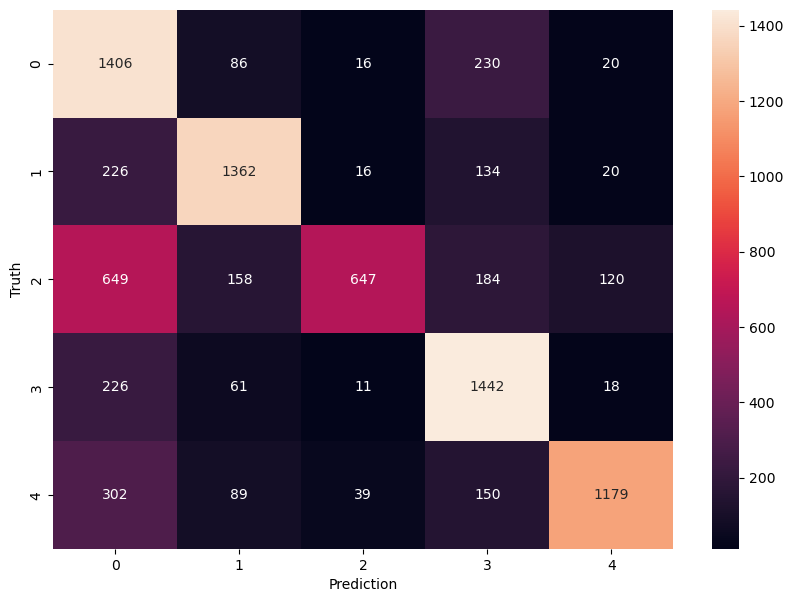

In [32]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')